In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
data=load_breast_cancer()

X=pd.DataFrame(data.data, columns=data.feature_names)
y=pd.Series(data.target)

X.shape, y.shape

((569, 30), (569,))

In [3]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y, stratify=y, random_state=42, test_size=0.2
)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(max_iter=5000)

log_reg.fit(X_train, y_train)

y_pred=log_reg.predict(X_test)

y_pred[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

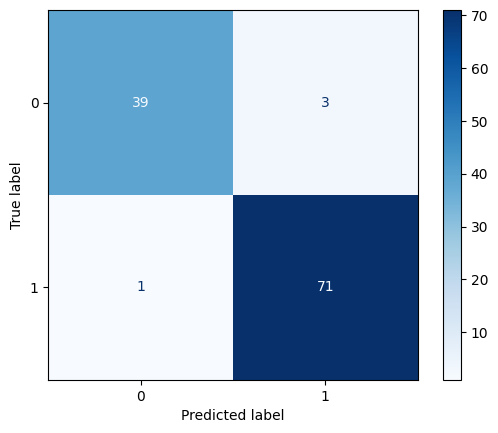

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc=accuracy_score(y_test, y_pred)
prec=precision_score(y_test, y_pred)
rec=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

acc, prec, rec, f1

(0.9649122807017544,
 0.9594594594594594,
 0.9861111111111112,
 0.9726027397260274)

In [9]:
from sklearn.metrics import roc_curve, auc

y_prob=log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds=roc_curve(y_test, y_prob)

roc_auc=auc(fpr, tpr)
roc_auc

0.9953703703703703

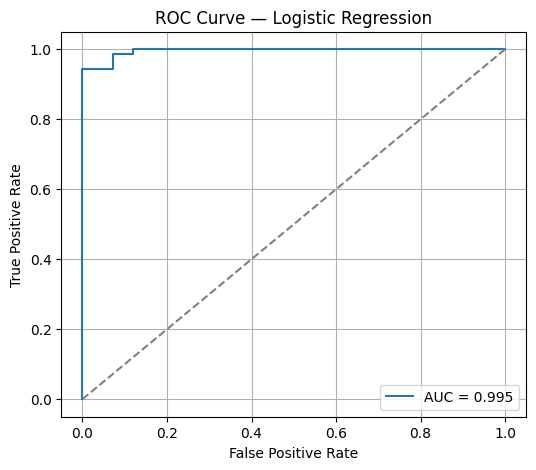

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
y_prob_class1=log_reg.predict(X_test)

y_prob_class1[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [16]:
import numpy as np

threshold=0.3

y_pred_thresh=(y_prob_class1 >=threshold).astype(int)

y_pred_thresh[:20]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

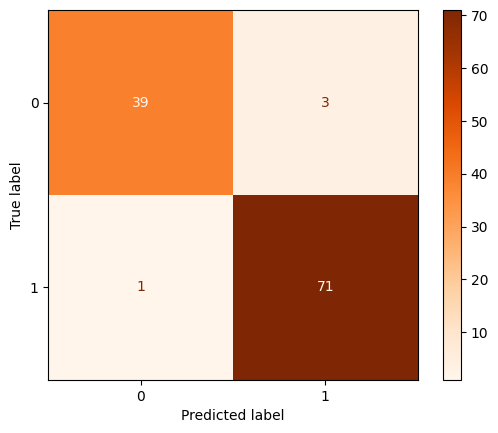

In [17]:
cm2 = confusion_matrix(y_test, y_pred_thresh)
ConfusionMatrixDisplay(cm2).plot(cmap="Oranges")

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))
print("F1-score:", f1_score(y_test, y_pred_thresh))

Accuracy: 0.9649122807017544
Precision: 0.9594594594594594
Recall: 0.9861111111111112
F1-score: 0.9726027397260274
